In [86]:
#getting the temperature data from the raspberry pi
#temp_get() is the function that returns the values
#     return cel, far, kel
#print(list(temp_get())) -> returns [cel,far,kel]

import datetime
import time
import keyboard
import numpy
import matplotlib
import matplotlib.pyplot as pyplot
from pylab import *
import pylab

def time_get():
    ct = time.localtime()
    hour = str(ct[3])
    minute = str(ct[4])
    second = str(ct[5])
    hms = (hour+minute+second)
    return hms

In [92]:
def fahrenheit():
    count = 0
    fahr = open("fahrenheit.txt","w+")
    while count != totalLoops:
        currenttime = time_get()
        #currenttemp = list(temp_get())
        fahrenheittemp = input("Enter temp value 60-90:")+"\n"
        #fahrenheittemp = str(currenttemp[1])+"\n"
        data = currenttime + "," + fahrenheittemp
        if count == 0:
            fahr.write("0,")
            fahr.write(fahrenheittemp)
        if count == totalLoops:
            break
        fahr.write(data)
        count += 1
        time.sleep(interval)
    fahr.close()
    fahrenheit_graph()

def kelvin():
    count = 0
    kelv = open("kelvin.txt","w+")
    while count != totalLoops:
        currenttime = time_get()
        #currenttemp = list(temp_get())
        kelvintemp = input("Enter temp value 289-305:")+"\n"
        #kelvintemp = str(currenttemp[2])+"\n"
        data = currenttime + "," + kelvintemp
        if count == 0:
            kelv.write("0,")
            kelv.write(kelvintemp)        
        if count == totalLoops:
            break
        kelv.write(data)
        count += 1
        time.sleep(interval)
    kelv.close()
    kelvin_graph()
    
def celsius():
    count = 0
    cels = open("celsius.txt","w+")
    while count != totalLoops:
        currenttime = time_get()
        #currenttemp = list(temp_get())
        celsiustemp = input("Enter temp value 16-32:")+"\n"
        #celsiustemp = str(currenttemp[0])+"\n"
        data = currenttime + "," + celsiustemp
        if count == 0:
            cels.write("0,")
            cels.write(celsiustemp)
        if count == totalLoops:
            break
        cels.write(data)
        count += 1
        time.sleep(interval)
    cels.close()
    celsius_graph()

In [93]:
def celsius_graph():
    ax = pyplot.gca()
    ax.set_ylim([16,32])
    ax.set_xlim([0,minutes])
    cels = open("celsius.txt","r")
    xaxis = timeaxis
    yaxis = []
    for line in cels:
        num = ""
        x, y = line.split(',')
        for i in y:
            if i not in ("\n"):
                num += i
            newy = float(num)        
        yaxis.append(newy)
    pyplot.plot(xaxis, yaxis)
    pyplot.xlabel("Time since starting (min)")
    pyplot.ylabel("Degrees (c)")
    pyplot.title("Temperature over time")
    pyplot.grid(True)
    pyplot.savefig("CelsiusTest.png")
    pyplot.show()
    cels.close()
    
def fahrenheit_graph():
    ax = pyplot.gca()
    ax.set_ylim([60,90])
    ax.set_xlim([0,minutes])
    fahr = open("fahrenheit.txt","r")
    xaxis = timeaxis
    yaxis = []
    for line in fahr:
        num = ""
        x, y = line.split(',')
        for i in y:
            if i not in ("\n"):
                num += i
            newy = float(num)        
        yaxis.append(newy)
    pyplot.plot(xaxis, yaxis)
    pyplot.xlabel("Time since starting (min)")
    pyplot.ylabel("Degrees (f)")
    pyplot.title("Temperature over time")
    pyplot.grid(True)
    pyplot.savefig("FahrenheitTest.png")
    pyplot.show()
    fahr.close()
    
def kelvin_graph():
    ax = pyplot.gca()
    ax.set_ylim([289,305])
    ax.set_xlim([0,minutes])
    kelv = open("kelvin.txt","r")
    xaxis = timeaxis
    yaxis = []
    for line in kelv:
        num = ""
        x, y = line.split(',')
        for i in y:
            if i not in ("\n"):
                num += i
            newy = float(num)        
        yaxis.append(newy)
    pyplot.plot(xaxis, yaxis)
    pyplot.xlabel("Time since starting (min)")
    pyplot.ylabel("Degrees (k)")
    pyplot.title("Temperature over time")
    pyplot.grid(True)
    pyplot.savefig("KelvinTest.png")
    pyplot.show()
    kelv.close()

Enter total time you would like the program to run for in minutes (minimum 1): .25
Enter how often you would like to obtain the data in seconds (minimun 1): 3
Celsius:c, Fahrenheit:f, Kelvin:k k
Enter temp value 289-305: 289
Enter temp value 289-305: 292
Enter temp value 289-305: 293.62442528
Enter temp value 289-305: 310
Enter temp value 289-305: 302


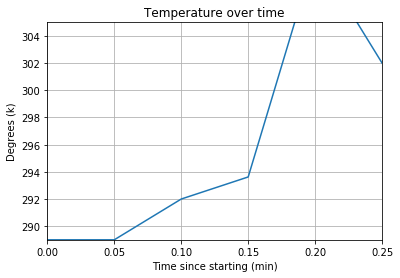

Done!


In [96]:
minutes = float(input("Enter total time you would like the program to run for in minutes (minimum 1):"))
interval = int(input("Enter how often you would like to obtain the data in seconds (minimun 1):"))
seconds = minutes * 60
newinterval = interval / 60
totalLoops = seconds / interval
timeaxis = numpy.arange(0,minutes+newinterval,newinterval)

deg = input("Celsius:c, Fahrenheit:f, Kelvin:k")
if deg == "c":
    celsius()
elif deg == "f":
    fahrenheit()
elif deg == "k":
    kelvin()
else:
    print("Error: Wrong input")
print("Done!")